In [1]:
# import libraries
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set maximum number of rows to display from a pandas data frame
#pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_rows', 30000)

In [3]:
#create dataframe for results of settlement calculations
settlements_df = pd.DataFrame()

# import cataFrame with calculated results from Tunnel GIS
align_data_df = pd.read_csv('Ostroehre.TunnelExcavationData.R2.csv',index_col=0)

align_data_df

Station      Easting     Northing  Elevation      DTM  RockSurface  \
0       204+874.1  2612071.548  1269294.122    270.962  253.524      236.000   
1         204+876  2612072.991  1269295.359    270.989  253.612      236.000   
2         204+879  2612075.303  1269297.270    271.033  253.160      236.000   
3         204+882  2612077.657  1269299.129    271.076  253.160      235.815   
4         204+885  2612080.052  1269300.936    271.120  252.934      235.815   
5         204+888  2612082.487  1269302.689    271.163  252.934      235.815   
6         204+891  2612084.959  1269304.388    271.207  252.934      235.815   
7         204+894  2612087.469  1269306.031    271.250  252.574      235.815   
8         204+897  2612090.014  1269307.619    271.294  252.013      235.815   
9         204+900  2612092.594  1269309.150    271.337  252.013      235.707   
10        204+903  2612095.208  1269310.623    271.381  251.805      235.707   
11        204+906  2612097.853  1269312.038    271.424  251.805      235.707   
12        204+909  2612100.529  1269313.394    271.468  251.631      235.707   
13        204+912  2612103.234  1269314.690    271.511  251.631      235.707   
14        204+915  2612105.968  1269315.927    271.555  251.149      235.707   
15        204+918  2612108.728  1269317.102    271.598  251.149      235.707   
16        204+921  2612111.513  1269318.216    271.642  251.157      235.707   
17        204+924  2612114.323  1269319.268    271.685  251.157      236.000   
18        204+927  2612117.155  1269320.257    271.729  250.696      236.000   
19    204+927.637  2612117.759  1269320.459    271.738  250.696      236.000   
20        204+930  2612120.008  1269321.183    271.771  250.666      236.000   
21        204+933  2612122.881  1269322.046    271.811  250.666      236.000   
22        204+936  2612125.773  1269322.845    271.847  250.637      236.000   
23        204+939  2612128.682  1269323.580    271.879  250.637      236.000   
24        204+942  2612131.606  1269324.250    271.909  250.638      236.000   
25        204+945  2612134.544  1269324.855    271.935  250.638      235.707   
26        204+948  2612137.495  1269325.395    271.958  248.991      235.707   
27        204+951  2612140.457  1269325.869    271.978  249.589      235.707   
28        204+954  2612143.429  1269326.277    271.994  249.589      235.707   
29        204+957  2612146.409  1269326.620    272.007  250.456      235.707   
30        204+960  2612149.397  1269326.896    272.017  250.456      235.707   
31        204+963  2612152.389  1269327.107    272.023  250.596      235.707   
32        204+966  2612155.386  1269327.251    272.027  250.735      235.667   
33        204+969  2612158.385  1269327.328    272.027  250.735      235.667   
34        204+972  2612161.384  1269327.339    272.023  250.795      235.667   
35        204+975  2612164.384  1269327.284    272.017  250.795      235.667   
36        204+978  2612167.381  1269327.162    272.007  250.881      235.667   
37        204+981  2612170.375  1269326.973    271.994  250.954      235.667   
38        204+984  2612173.364  1269326.718    271.978  250.954      235.667   
39        204+987  2612176.347  1269326.398    271.958  250.981      236.000   
40        204+990  2612179.322  1269326.011    271.935  250.981      236.000   
41        204+993  2612182.288  1269325.558    271.909  251.008      236.000   
42        204+996  2612185.242  1269325.040    271.879  250.956      236.000   
43        204+999  2612188.185  1269324.456    271.847  251.137      236.000   
44        205+002  2612191.114  1269323.808    271.811  251.031      236.000   
45        205+005  2612194.028  1269323.094    271.771  251.031      236.000   
46        205+008  2612196.925  1269322.316    271.729  251.037      236.000   
47        205+011  2612199.805  1269321.474    271.683  251.037      236.000   
48        205+014  2612202.665  1269320.569    271.634  251.048      236.000   
49    205+

In [4]:
#len(align_data_df.index)
len(align_data_df)  #includes header and 1 blank line ???
#align_data_df.count()

1593

In [5]:
# calculate settlements at stationed points along tunnel alignment
for i in range(len(align_data_df.index) - 3): #start loop over rows (=points) in align_data_df
    # read values which are needed for calculation of point i into a numpy array
    pt_a = array( [align_data_df['Easting'][i], align_data_df['Northing'][i], align_data_df['Elevation'][i], 
                   align_data_df['DTM'][i], align_data_df['RockCover'][i]] )
    pt_a = asfarray(pt_a,float)  #return an array converted to a float type
    stat = align_data_df['Station'][i]
    # read in the values which are needed for calculation of point i+1
    pt_b = array( [align_data_df['Easting'][i+1], align_data_df['Northing'][i+1], align_data_df['Elevation'][i+1],
                   align_data_df['DTM'][i+1], align_data_df['RockCover'][i+1]] )
    pt_b=asfarray(pt_b,float)
    d = pt_a[3] - pt_a[2]  #total overburden in m
    if d < 4: #if the overburden is < 4, stop calculation (cut & cover section)                                          #ToDo JK -rework 
        continue  #return (to for loop without executing statement below)                          #ToDo JK -rework 
  
    # define normal vector (=cross-section) to alignment at point a                    #ToDo JK -make into function
    v_ab = array([pt_b[0] - pt_a[0], pt_b[1] - pt_a[1]])  #vector between point i and i+1
    nv_ab = array([-v_ab[1], v_ab[0]])  #normal vector to alginment at point a
    norm = (nv_ab[0]**2 + nv_ab[1]**2)**0.5  #magnitude of normal vector
    nnv_ab = nv_ab / norm  #unit normal vector
    #res = 2.0  #resolution for point along cross-section                                     #ToDo JK -mv to inputs
    res = 5.0
    l_range, r_range = 40.0, 40.0                                                            #ToDo JK -mv to inputs
    xs_pts = arange(-l_range, r_range+res, res)
    X_i = pt_a[0] + nnv_ab[0]*xs_pts  #list of x-coords along cross-section
    Y_i = pt_a[1] + nnv_ab[1]*xs_pts  #list of x-coords along cross-section
    #print('i= ', i)
    #print('v_ab: ', v_ab)
    #print('nv_ab: ', nv_ab)
    #print('X_i: ', X_i)
    #print('Y_i: ', Y_i)
    
    '''Calculate Greenfield-Settlements with Gauss Kurve'''
    #Input Paraneter
    D_t=13.0    #Tunneldiameter in [m]                                                       #mv to input above
    K_g=0.5   #K_g [0.4-0.6] nach Fillibeck für nichtbindigen Boden, dicht gelagert
    K_t=0.7   #K_t [0.5-0.9] nach Fillibeck für bindigen Boden, dicht gelagert
    
    if pt_a[4] < 0.0 :                                                                          #a[4]: rockcover
        i_0=K_g*d   #Wendepunktabstand für Tunnel im Lockergestein                              #d : total cover
    else:                                                                                    #elif a[4] > 0.0 :
        i_0=K_t * pt_a[4] + K_g*(d-pt_a[4])   #Wendepunktabstand für Tunnel im Fels

    A_t = ((D_t**2.0) * pi) / 4.0
    V_l= 0.0064*(A_t/d)**(-0.75)  #nach Fillibeck,90%-Wahrscheinlichkeit, gilt für h/d>0.3

    # calculate Settlement trough with gaussian curve
    #print('i = ', i)
    S= -((pi/2)**(0.5)) * (V_l*(D_t**2))/(4*i_0) *exp(-(xs_pts**2)/(2*i_0**2))
    beta=zeros((len(S)))    #creates vector for tangentenneigung  #numpy: return a new array filled with zeros
    beta[1:]=abs((diff(S)/res))  #tangentenneigung der setzungen  #python array slice notation: start at index 1
    
    '''data frame'''
    #create dataframe including the calculated settlements etc. 
    calc_results = {'station':stat,
                    'x_station':pt_a[0],
                    'y_station':pt_a[1],
                    'x-sect_x': X_i,
                    'x-sect_y': Y_i,
                    'settlement [mm]': S*1000,
                    'diff_settle': beta,
                    'depth': d}
    
    calc_results_df = pd.DataFrame(calc_results)

    #append the calculated values to the dataframe
    settlements_df=settlements_df.append(calc_results_df)
    
    stat_monitor = '208+374'
    if stat == stat_monitor:
        S_stat_monitor = S
        print(beta[0])
        print(S)
        print(beta[1:])
    
#when loop is finished, safe dataframe to .csv
settlements_df.to_csv('Settlement.csv')
print('run complete')

0.0
[-6.20789272e-06 -3.32013666e-05 -1.41994923e-04 -4.85617994e-04
 -1.32807263e-03 -2.90438362e-03 -5.07915225e-03 -7.10286536e-03
 -7.94293544e-03 -7.10286536e-03 -5.07915225e-03 -2.90438362e-03
 -1.32807263e-03 -4.85617994e-04 -1.41994923e-04 -3.32013666e-05
 -6.20789272e-06]
[5.39869478e-06 2.17587112e-05 6.87246143e-05 1.68490926e-04
 3.15262198e-04 4.34953725e-04 4.04742622e-04 1.68014017e-04
 1.68014017e-04 4.04742622e-04 4.34953725e-04 3.15262198e-04
 1.68490926e-04 6.87246143e-05 2.17587112e-05 5.39869478e-06]
run complete


In [6]:
settlements_df.head()
#settlements_df

depth   diff_settle  settlement [mm]  station      x-sect_x      x-sect_y  \
0  4.225  0.000000e+00    -1.692075e-77  205+287  2.612341e+06  1.269100e+06   
1  4.225  5.976928e-63    -2.988464e-59  205+287  2.612345e+06  1.269103e+06   
2  4.225  3.895555e-47    -1.947777e-43  205+287  2.612350e+06  1.269105e+06   
3  4.225  9.369653e-34    -4.684826e-30  205+287  2.612354e+06  1.269107e+06   
4  4.225  8.316499e-23    -4.158249e-19  205+287  2.612359e+06  1.269110e+06   

     x_station    y_station  
0  2612376.162  1269119.388  
1  2612376.162  1269119.388  
2  2612376.162  1269119.388  
3  2612376.162  1269119.388  
4  2612376.162  1269119.388

In [7]:
# set up plotly in 'offline' mode                                #ToDo JK: this should be cleaned up and documented
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
print (__version__) # requires version >= 1.9.0

# collect all plotly setups here
import plotly.offline as plotly  #testing
from plotly.graph_objs import *  #testing

2.2.1


In [8]:
alignment_stationed_line_plot = go.Scatter(
    x=align_data_df['Easting'].tolist(),
    y=align_data_df['Northing'].tolist(),
    line=dict(width=3,
              color='rgb(0, 0, 0)'),
    name ="alignment_stationed_line",
    #hoverinfo = 'none',
    hoverinfo = 'text',
    text = align_data_df['Station'].tolist(),
)

# alignment_point_plot = go.Scatter(
#     x=alignment_df['Easting'].tolist(),
#     y=alignment_df['Northing'].tolist(),
#     name ="alignment_point",
#     mode = "markers",
#     marker = dict(
#         size = 20,
#         color = 'rgb(255, 153, 153)'
#     )
# )

# alignment_stationed_point_plot = go.Scatter(
#     x=alignment_stationed_df['x_align'].tolist(),
#     y=alignment_stationed_df['y_align'].tolist(),
#     mode = "markers",
#     name ="alignment_stationed_point",
#     marker = dict(
#         size = 15,
#         color = 'rgb(255, 0, 0)'
#     )
# )

cross_section_point_plot = go.Scatter(
    x=settlements_df['x-sect_x'].tolist(),
    y=settlements_df['x-sect_y'].tolist(),
    mode = "markers",
    name = "section_points",
    hoverinfo = 'none',

    marker = dict(
        #size = 10,
        #color = 'rgb(0, 0, 153)'
        #color = settlements_df['settlement [mm]'].tolist(),
        color = settlements_df['diff_settle'].tolist(),
        
        #colorscale='Viridis',        
        #colorscale='Jet',
        #colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'],
        #[0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'],
        #[0.6666666666666666, 'rgb(171,217,233)'],[0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'],
        #[1.0, 'rgb(49,54,149)']],
        colorscale = 'Hot',
        
        colorbar=ColorBar(              #legend
                title = 'Settlements',
                len = 0.5)
    )
)

#cross_section_point_plot = go.Scatter(
#    #x=settlements_df['x_station'].tolist(),
#    #y=settlements_df['y_station'].tolist(),
#    x=settlements_df['x-sect_x'].tolist(),
#    y=settlements_df['x-sect_y'].tolist(),
#    name ="buffer_all_point",
#      marker = dict(
        #size = 10,
#        color = 'rgb(0, 0, 153)'
        
        #color = 'rgb(0,'+str(-settlements_df['settlement [mm]']*255/12)+',0)'
        #color = 'rgb(0, 0, 255)'
        
        #color = colorscale
        #color = random.randn(500), #set color equal to a variable
        #color = settlements_df['settlement [mm]'].tolist(),
        #colorscale='Viridis',        
#    )
#)

#data = [alignment_stationed_line_plot, alignment_point_plot, alignment_stationed_point_plot, buffer_all_df_point_plot]
data = [alignment_stationed_line_plot, cross_section_point_plot]
layout = go.Layout(yaxis=dict(scaleanchor="x", scaleratio=1))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='settlement-plot')

In [9]:
settlements_df.set_index("station", inplace=True)
#settlements_df.set_index("station")  # ??
#settlements_df.reset_index()  #doesn't do what I expect, which would return to previous state !!

#settlements_df.head()

In [41]:
stat_monitor = '206+823'

test_list = settlements_df.loc[[stat_monitor], ['diff_settle']]
test_filtered = array(test_list['diff_settle'].tolist()[1:])  #index=0 was set to zero above
print(test_filtered)

[9.59309244e-05 9.88345659e-05 9.69902337e-05 8.97882131e-05
 7.70882258e-05 5.92986632e-05 3.73811574e-05 1.27720257e-05
 1.27720257e-05 3.73811574e-05 5.92986632e-05 7.70882258e-05
 8.97882131e-05 9.69902337e-05 9.88345659e-05 9.59309244e-05]


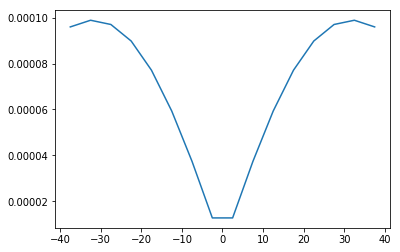

In [42]:
# plot results
fig=plt.figure()
#print('xs_pts: ', xs_pts)
#print('S: ', S*1000)
#p1 = plt.plot(xs_pts, S*1000) 
##p1 = plt.plot(xs_pts, S_stat_monitor*1000) 

xs_pts_plt = xs_pts[1:]
xs_pts_plt = xs_pts_plt -res/2
#print(xs_pts_plt)

#p1 = plt.plot(xs_pts, test_filtered*1000) 
#p1 = plt.plot(xs_pts, test_filtered) 
p1 = plt.plot(xs_pts_plt, test_filtered) 

#plt.xticks(y_pos+width, objects)  # ??
#plt.ylim((0,110))  # ??
##p2 = plt.plot(x_dir, a[2])
##p2 = plt.plot(x_dir, a[3])
##p3 = plt.plot(x_dir, a[4])
##plt.ylabel('Settlement [mm]', **axis_font)
##plt.xlabel('Distance from tunnel axis [m]', **axis_font)
##plt.yticks( **axis_font)
##plt.xticks( **axis_font)
####titleA=('Greenfield-Settlements, Station ' +str(align_data_df['Station'][i]))
##titleA=('Greenfield-Settlements, Station ' +str(a[5]))
##plt.title(titleA, **title_font)
#plt.legend()
plt.show()
#fig.savefig('C:\Users\kzq653\Documents\geopython\settlementtrough_bilder_test' + str(titleA) +'.png', dpi=300)

In [40]:
z_dtm_align = go.Scatter(
    x=align_data_df['StationReal'].tolist(),
    y=align_data_df['DTM'].tolist(),
    name = "Terrain",
    mode='lines',
    line=dict(width=0.5,
              #color='rgb(196, 97, 26)'
             ),
    fill='tozeroy'
)

z_rock_align = go.Scatter(
    x=align_data_df['StationReal'].tolist(),
    y=align_data_df['RockSurface'].tolist(),
    name = "Terrain",
    mode='lines',
    line=dict(width=0.5,
              #color='rgb(196, 97, 26)'
             ),
    fill='tonexty'
)

z_align_line = go.Scatter(
    x=align_data_df['StationReal'].tolist(),
    y=align_data_df['Elevation'].tolist(),
    line=dict(width=3,
              color='rgb(0, 0, 0)'),
    name ="Tunnel"
)

data = [z_dtm_align, z_rock_align, z_align_line]

layout = go.Layout(
    title='Longitudinal Section',
    showlegend=True,
    xaxis=dict(
        title= "Stationing",
    ),
    yaxis=dict(
        title = "m a.s.l.",
        range = [180,300]
    )
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='stacked-area-plot')